In [1]:
import pandas as pd
import numpy as np
import re
import string
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



In [2]:
data = pd.read_csv("data_capec.csv")
data['text'] = data["text"].str.replace('/',' ')
X = data["text"]
y = data["label"]

# Tiền xử lý dữ liệu
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình


In [3]:
rlist =['000 - Normal', '126 - Path Traversal',
       '153 - Input Data Manipulation', '194 - Fake the Source of Data',
       '242 - Code Injection', '272 - Protocol Manipulation',
       '310 - Scanning for Vulnerable Software',
       '34 - HTTP Response Splitting', '66 - SQL Injection']

In [4]:
mapping = {l: i for i, l in enumerate(rlist)}
mapping

{'000 - Normal': 0,
 '126 - Path Traversal': 1,
 '153 - Input Data Manipulation': 2,
 '194 - Fake the Source of Data': 3,
 '242 - Code Injection': 4,
 '272 - Protocol Manipulation': 5,
 '310 - Scanning for Vulnerable Software': 6,
 '34 - HTTP Response Splitting': 7,
 '66 - SQL Injection': 8}

In [5]:
mapping['000 - Normal']

0

In [6]:
y_train = [mapping[s] for s in y_train] 
y_test = [mapping[r] for r in y_test]  

In [7]:
from keras.utils.np_utils import to_categorical

In [8]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train = to_categorical(y_train, num_classes=9)
y_test = to_categorical(y_test ,num_classes=9)

In [9]:
X_train.shape

(290244, 100)

In [10]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=100))
model.add(GRU(units=32))
model.add(Dropout(0.2))
model.add(Dense(9, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

# Đánh giá mô hình
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
print(classification_report(y_test, y_pred, target_names=rlist, labels= range(9)))

Epoch 1/5
4536/4536 [==============================] - 110s 24ms/step - loss: 0.1443 - accuracy: 0.9579 - val_loss: 0.0521 - val_accuracy: 0.9837
Epoch 2/5
4536/4536 [==============================] - 109s 24ms/step - loss: 0.0484 - accuracy: 0.9851 - val_loss: 0.0397 - val_accuracy: 0.9873
Epoch 3/5
4536/4536 [==============================] - 109s 24ms/step - loss: 0.0374 - accuracy: 0.9879 - val_loss: 0.0349 - val_accuracy: 0.9888
Epoch 4/5
4536/4536 [==============================] - 110s 24ms/step - loss: 0.0319 - accuracy: 0.9895 - val_loss: 0.0322 - val_accuracy: 0.9896
Epoch 5/5
2268/2268 [==============================] - 10s 4ms/step
                                        precision    recall  f1-score   support

                          000 - Normal       0.98      0.99      0.99     17959
                  126 - Path Traversal       1.00      0.99      0.99      2312
         153 - Input Data Manipulation       0.00      0.00      0.00       219
         194 - Fake the Sou

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:

y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
y_predict = np.argmax(y_pred , axis=1)
y_test_pre = np.argmax(y_test, axis=1)


In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_pre, y_predict)


In [14]:
import seaborn as sns

In [15]:
import matplotlib.pyplot as plt

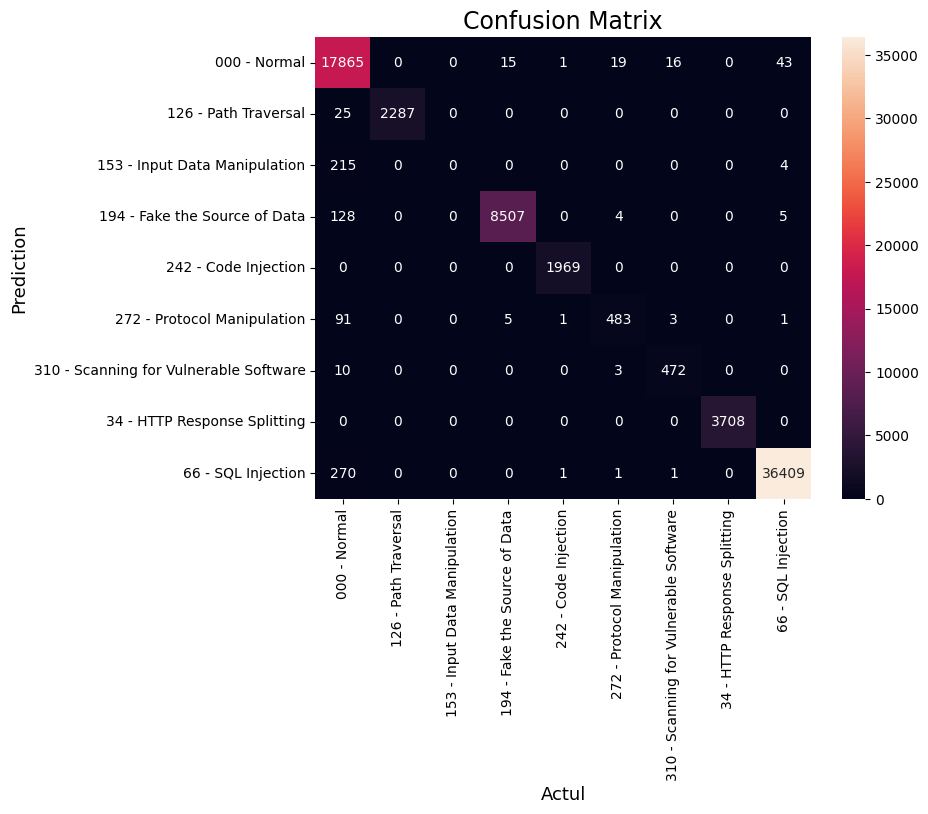

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='g',xticklabels = rlist,yticklabels= rlist)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actul',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [17]:
ong_tex = [tokenizer.sequences_to_texts(X_test)]
ong_tex[0][799]

'get blog index php 2560cat 2b 252fetc 252fpasswd 2560 my account edit profile 7b 7b 20data model url'

In [18]:
test_t ="POST /blog/index.php/my-account/edit-password/ username=pitifulFerret0&password=caMn#T8k&user-registration-login-nonce=6eac0e2d5f&_wp_http_referer=%2Fblog%2Findex.php%2Fmy-account%2Fedit-password%2F&login=Login&redirect=&rememberme=forever"

In [19]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=5000, output_dim=64, input_length=100))
model_lstm.add(LSTM(units=32))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(9, activation='softmax'))

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

# Đánh giá mô hình
y_pred = model_lstm.predict(X_test)
y_pred = np.round(y_pred)
print(classification_report(y_test, y_pred, target_names=rlist, labels=range(9)))

Epoch 1/5
4536/4536 [==============================] - 106s 23ms/step - loss: 0.1353 - accuracy: 0.9605 - val_loss: 0.0502 - val_accuracy: 0.9842
Epoch 2/5
4536/4536 [==============================] - 104s 23ms/step - loss: 0.0465 - accuracy: 0.9856 - val_loss: 0.0395 - val_accuracy: 0.9871
Epoch 3/5
4536/4536 [==============================] - 106s 23ms/step - loss: 0.0381 - accuracy: 0.9881 - val_loss: 0.0349 - val_accuracy: 0.9885
Epoch 4/5
4536/4536 [==============================] - 105s 23ms/step - loss: 0.0349 - accuracy: 0.9888 - val_loss: 0.0328 - val_accuracy: 0.9890
Epoch 5/5
2268/2268 [==============================] - 13s 6ms/step
                                        precision    recall  f1-score   support

                          000 - Normal       0.99      0.99      0.99     17959
                  126 - Path Traversal       1.00      0.99      0.99      2312
         153 - Input Data Manipulation       0.00      0.00      0.00       219
         194 - Fake the Sou

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
y_predict = np.argmax(y_pred , axis=1)
y_test_pre = np.argmax(y_test, axis=1)

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_pre, y_predict)

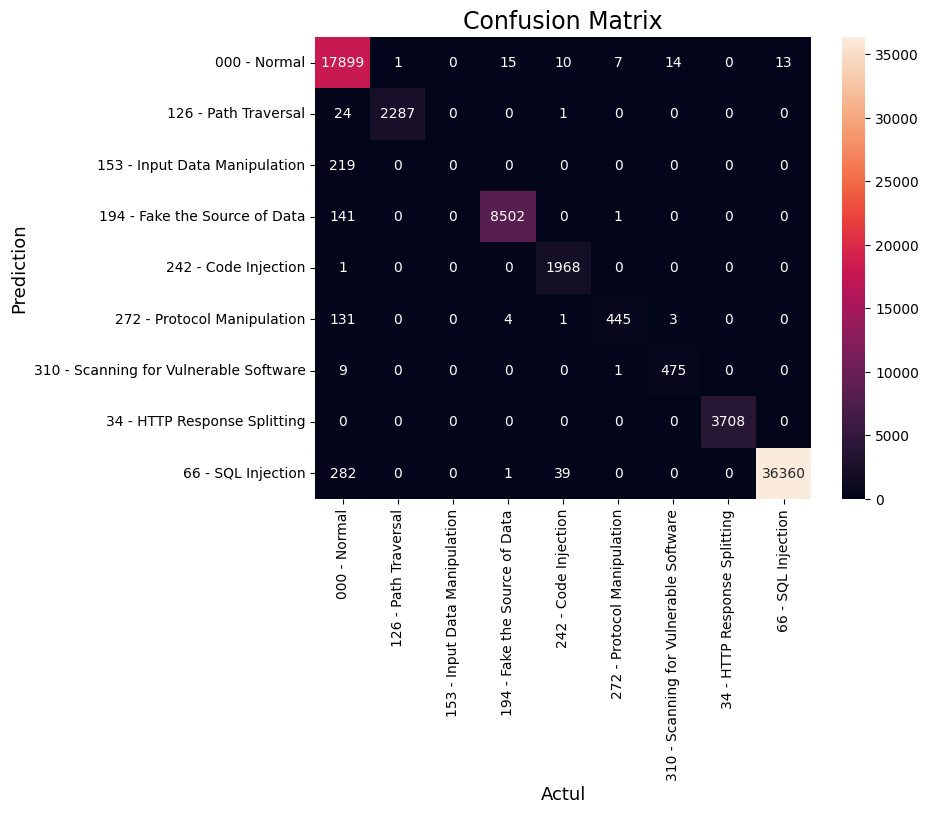

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='g',xticklabels = rlist,yticklabels= rlist)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actul',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


In [23]:
model_lstm_1 = Sequential()
model_lstm_1.add(Embedding(input_dim=5000, output_dim=64, input_length=100))
model_lstm_1.add(LSTM(units=32,return_sequences=True))
model_lstm_1.add(LSTM(units=32))
model_lstm_1.add(Dropout(0.2))
model_lstm_1.add(Dense(9, activation='softmax'))

model_lstm_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

# Đánh giá mô hình
y_pred = model_lstm_1.predict(X_test)
y_pred = np.round(y_pred)
print(classification_report(y_test, y_pred, target_names=rlist, labels=range(9)))

Epoch 1/5
4536/4536 [==============================] - 201s 44ms/step - loss: 0.1312 - accuracy: 0.9625 - val_loss: 0.0565 - val_accuracy: 0.9828
Epoch 2/5
4536/4536 [==============================] - 204s 45ms/step - loss: 0.0468 - accuracy: 0.9857 - val_loss: 0.0399 - val_accuracy: 0.9872
Epoch 3/5
4536/4536 [==============================] - 235s 52ms/step - loss: 0.0371 - accuracy: 0.9882 - val_loss: 0.0339 - val_accuracy: 0.9890
Epoch 4/5
4536/4536 [==============================] - 253s 56ms/step - loss: 0.0320 - accuracy: 0.9893 - val_loss: 0.0306 - val_accuracy: 0.9895
Epoch 5/5
2268/2268 [==============================] - 25s 11ms/step
                                        precision    recall  f1-score   support

                          000 - Normal       0.98      0.99      0.99     17959
                  126 - Path Traversal       1.00      0.99      0.99      2312
         153 - Input Data Manipulation       0.00      0.00      0.00       219
         194 - Fake the So

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
